In [1]:
from pathlib import Path
output_dir = '.'
import os

In [2]:
from allensdk.core.cell_types_cache import CellTypesCache
import os


In [3]:
# Instantiate the CellTypesCache instance.  The manifest_file argument
# tells it where to store the manifest, which is a JSON file that tracks
# file paths.  If you supply a relative path it will go into your
# current working directory
try:
    ctc = CellTypesCache(manifest_file=Path(output_dir) / 'manifest.json')
except:
    os.remove(Path(output_dir) / 'manifest.json')
    ctc = CellTypesCache(manifest_file=Path(output_dir) / 'manifest.json')
    
# this saves the NWB file to 'cell_types/specimen_464212183/ephys.nwb'
cell_specimen_id = 464212183
data_set = ctc.get_ephys_data(cell_specimen_id)

2023-07-22 16:23:27,796 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491202878


In [4]:
from allensdk.core.cell_types_cache import CellTypesCache

# Instantiate the CellTypesCache instance.  The manifest_file argument
# tells it where to store the manifest, which is a JSON file that tracks
# file paths.  If you supply a relative path it will go into your
# current working directory
ctc = CellTypesCache(manifest_file=Path(output_dir) / 'manifest.json')

# this saves the NWB file to 'cell_types/specimen_464212183/ephys.nwb'
cell_specimen_id = 464212183
data_set = ctc.get_ephys_data(cell_specimen_id)

In [5]:
from allensdk.core.cell_types_cache import CellTypesCache

# Instantiate the CellTypesCache instance.  The manifest_file argument
# tells it where to store the manifest, which is a JSON file that tracks
# file paths.  If you supply a relative path it will go into your
# current working directory
ctc = CellTypesCache(manifest_file=Path(output_dir) / 'manifest.json')

# this saves the NWB file to 'cell_types/specimen_464212183/ephys.nwb'
cell_specimen_id = 464212183
data_set = ctc.get_ephys_data(cell_specimen_id)

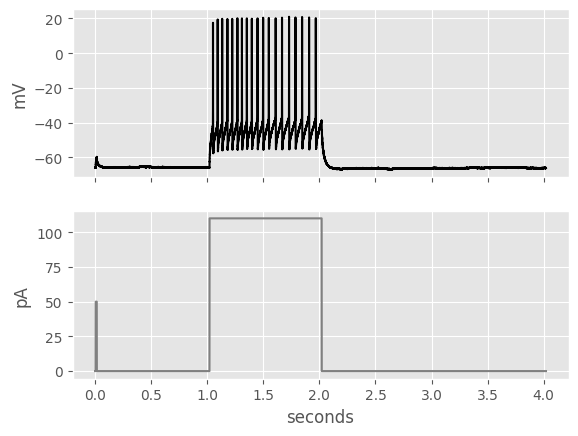

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

sweep_number = 30
sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, color='black')
axes[1].plot(t, i, color='gray')
axes[0].set_ylabel("mV")
axes[1].set_ylabel("pA")
axes[1].set_xlabel("seconds")
plt.show()